## Importing Libraries

In [1]:
import re
import csv
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud
plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
import tweet_preprocessor
import model_script
import warnings
warnings.filterwarnings('ignore')
from imblearn.combine import SMOTETomek,SMOTEENN
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /home/useradmin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/useradmin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/useradmin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/useradmin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Loading dataset

In [2]:
df = pd.read_csv("global-warming.csv")
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [3]:
df.shape

(15819, 3)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

## Data Cleaning

In [6]:
df = df.rename({'message' : 'tweet'}, axis=1)

In [7]:
df = tweet_preprocessor.tokenize_tweets(df)

Complete. Number of Tweets that have been cleaned and tokenized : 15819


In [8]:
df.head()

,sentiment,tweet,tweetid,tokens
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief think carbon dioxide ma...
1,1,It's not like we lack evidence of anthropogeni...,126103,like lack evidence anthropogenic global warm
2,2,RT @RawStory: Researchers say we have three ye...,698562,researchers years act climate change late
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,wire pivotal year war climate change
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,racist sexist climate change deny bigot lead poll


In [9]:
df = tweet_preprocessor.convertSentiment(df)
df.head()


,sentiment,tweet,tweetid,tokens
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief think carbon dioxide ma...
1,Pro,It's not like we lack evidence of anthropogeni...,126103,like lack evidence anthropogenic global warm
2,News,RT @RawStory: Researchers say we have three ye...,698562,researchers years act climate change late
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,wire pivotal year war climate change
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,racist sexist climate change deny bigot lead poll


In [10]:
# Extracting the hashtags from tweets in each class
pro = tweet_preprocessor.hashtag_extract(df['tweet'][df['sentiment'] == 'Pro'])
anti = tweet_preprocessor.hashtag_extract(df['tweet'][df['sentiment'] == 'Anti'])
neutral = tweet_preprocessor.hashtag_extract(df['tweet'][df['sentiment'] == 'Neutral'])
news = tweet_preprocessor.hashtag_extract(df['tweet'][df['sentiment'] == 'News'])

news.head()

,hashtag,count
0,climate,130
6,environment,44
11,climatechange,42
57,Trump,25
47,news,20


In [11]:
# Extract the top 25 words in each sentiment
pro_frequency = tweet_preprocessor.wordFrequency(df['tokens'][df['sentiment']=='Pro'])
anti_frequency = tweet_preprocessor.wordFrequency(df['tokens'][df['sentiment']=='Anti'])
news_frequency = tweet_preprocessor.wordFrequency(df['tokens'][df['sentiment']=='News'])
neutral_frequency = tweet_preprocessor.wordFrequency(df['tokens'][df['sentiment']=='Neutral'])

In [12]:
pro_frequency.head()

,word,freq
0,change,7256
1,climate,7209
2,global,1605
3,warm,1500
4,believe,1118


In [13]:
anti_frequency.head()

,word,freq
0,climate,799
1,change,786
2,global,639
3,warm,622
4,man,95


In [14]:
news_frequency.head()

,word,freq
0,change,3272
1,climate,3220
2,trump,1033
3,global,510
4,warm,444


In [15]:
neutral_frequency.head()

,word,freq
0,climate,1433
1,change,1422
2,global,1038
3,warm,1028
4,trump,170


In [16]:
# Extract the words in the tweets 
anti_words = ' '.join([text for text in anti_frequency['word']])
pro_words = ' '.join([text for text in pro_frequency['word']])
news_words = ' '.join([text for text in news_frequency['word']])
neutral_words = ' '.join([text for text in neutral_frequency['word']])

In [17]:
# Call function to create wordcloud for each sentiment
anti_wordcloud = tweet_preprocessor.getWordCloud(anti_words, "Reds", 110)
pro_wordcloud = tweet_preprocessor.getWordCloud(pro_words, "Greens", 73)
news_wordcloud = tweet_preprocessor.getWordCloud(news_words, "Blues", 0)
neutral_wordcloud = tweet_preprocessor.getWordCloud(neutral_words, "Oranges", 10)


In [18]:
# Extract top entities for each sentiment
anti_info = tweet_preprocessor.entity_extractor(df['tokens'][df['sentiment']=='Anti'])
pro_info = tweet_preprocessor.entity_extractor(df['tokens'][df['sentiment']=='Pro'])
news_info = tweet_preprocessor.entity_extractor(df['tokens'][df['sentiment']=='News'])
neutral_info = tweet_preprocessor.entity_extractor(df['tokens'][df['sentiment']=='Neutral'])

In [19]:
# Create a column privides the length for words 
df['length'] = df['tokens'].str.len()

## Exploratory data analysis

Text(0, 0.5, 'Count')

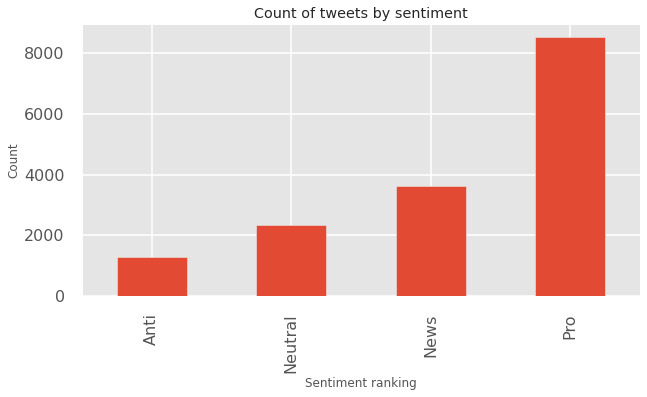

In [20]:
# Sentiment count bar graph
ax = df['sentiment'].value_counts().sort_index().plot(kind='bar', title='Count of tweets by sentiment',
                                                figsize=(10,5))
ax.set_xlabel('Sentiment ranking')
ax.set_ylabel('Count')

Text(0.5, 1.0, 'Sentiment Pie Chart')

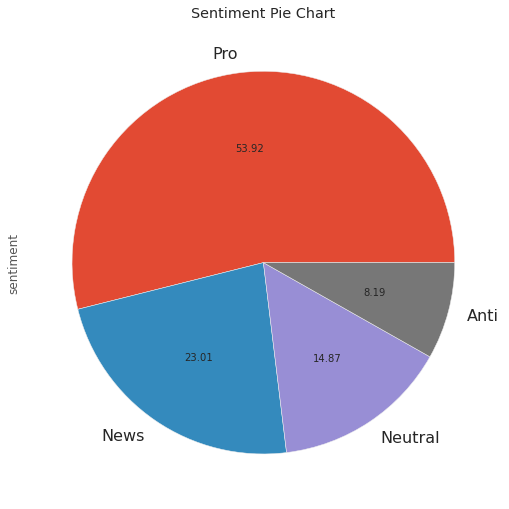

In [21]:
df['sentiment'].value_counts().plot.pie(autopct='%.2f')
plt.title('Sentiment Pie Chart')

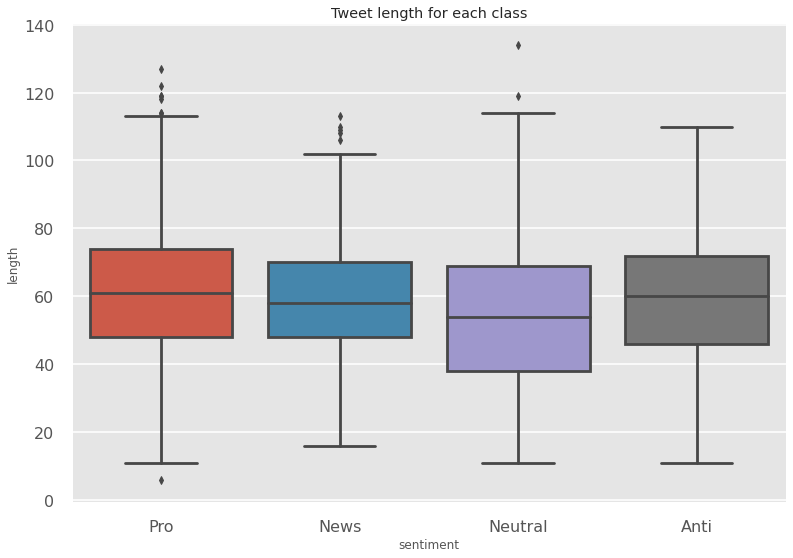

In [22]:
# Plot the distribution of the length tweets for each sentiment using a box plot
sns.boxplot(x=df['sentiment'], y=df['length'], data=df)
plt.title('Tweet length for each class')
plt.show()

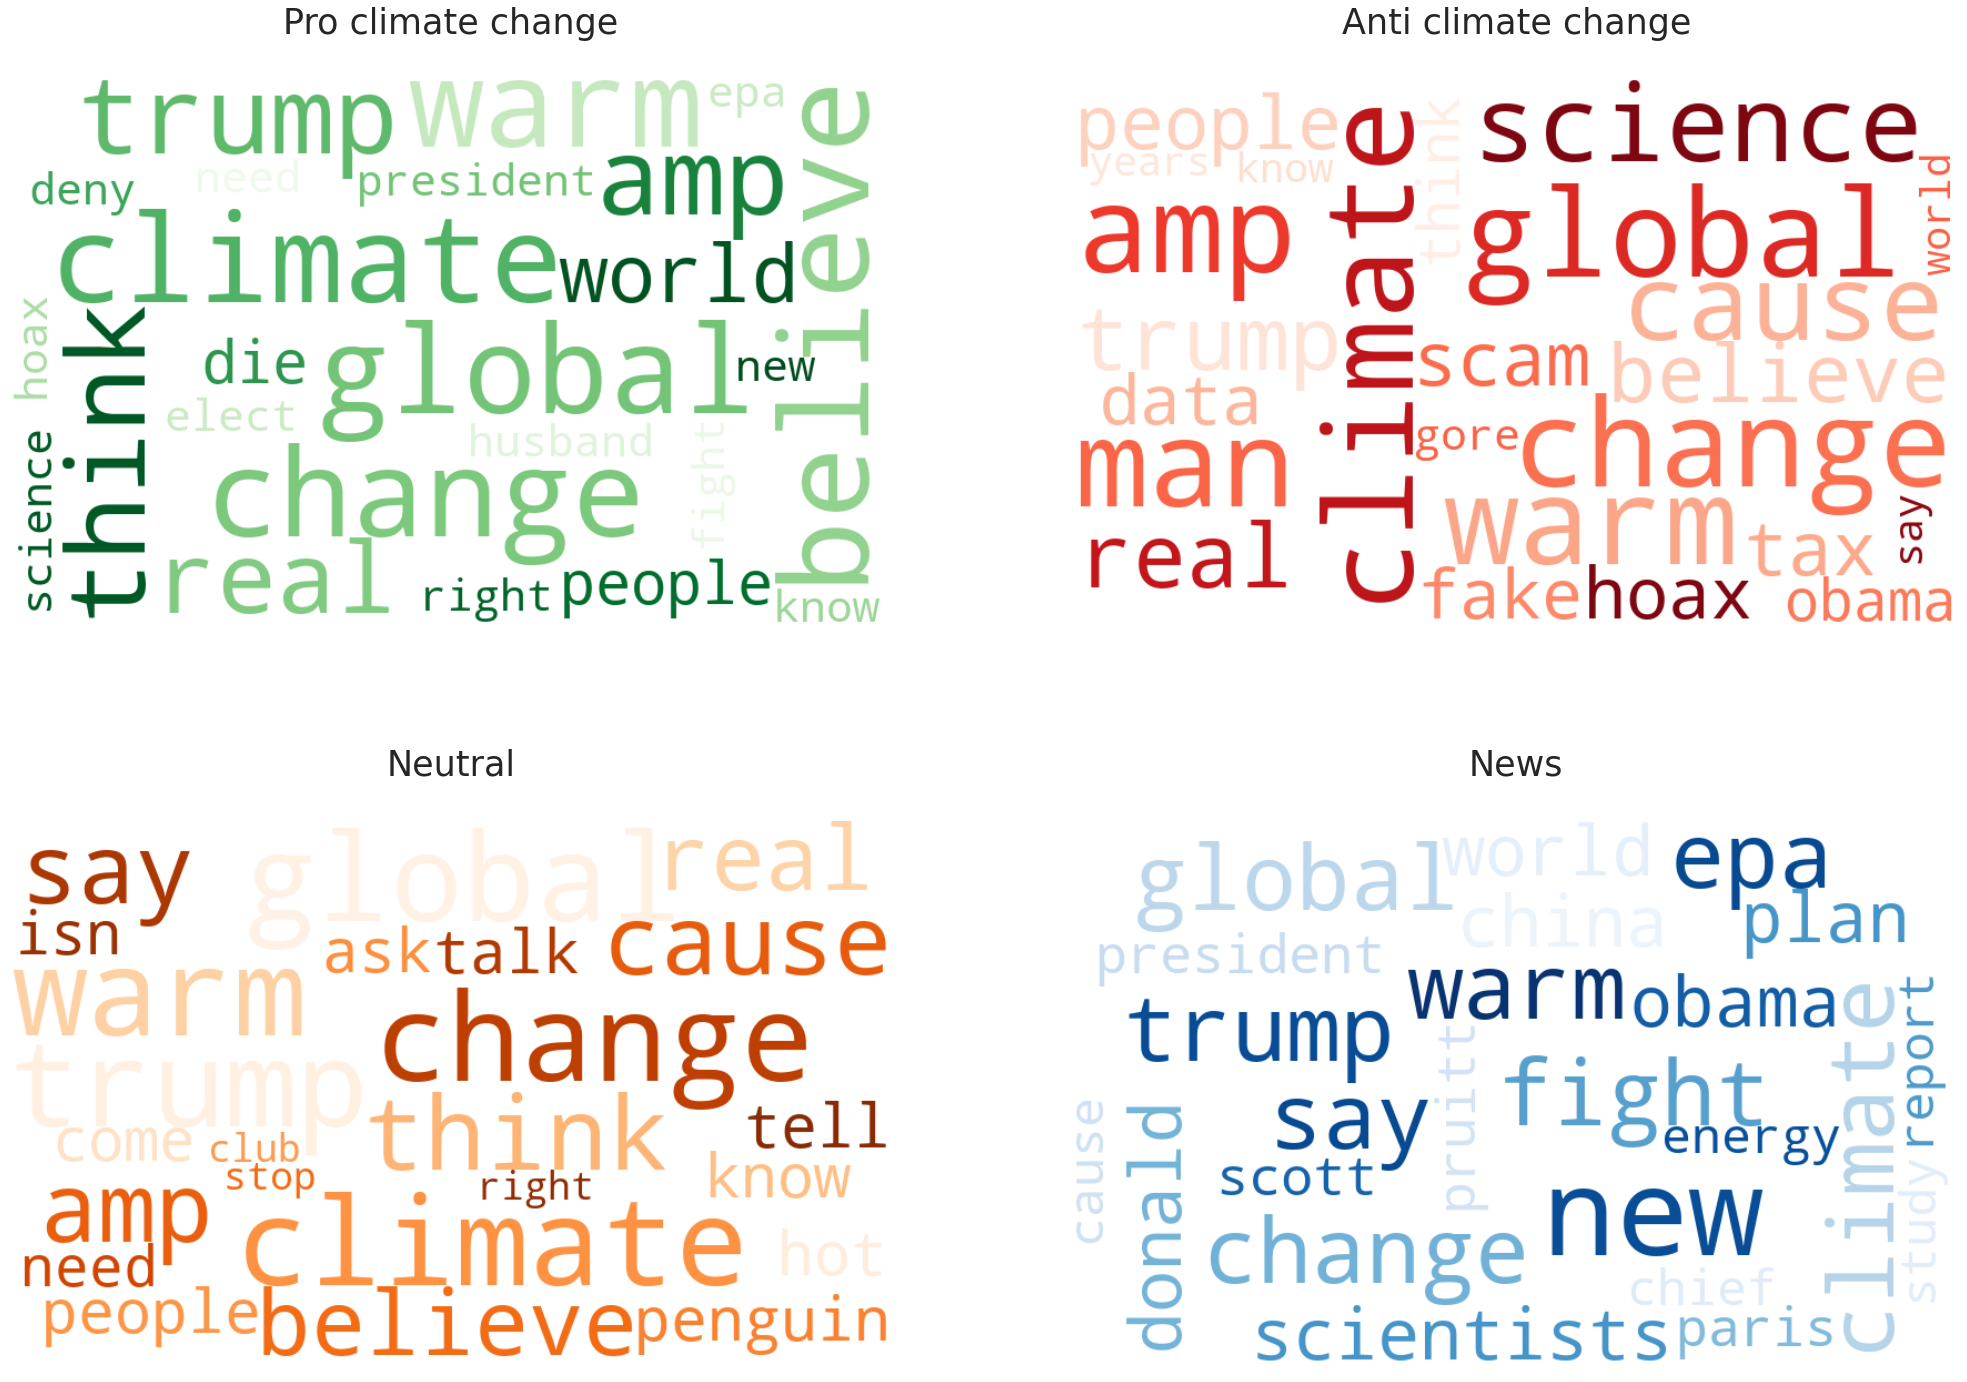

In [23]:
# Plot pro and anti wordclouds next to one another for comparisson
f, axarr = plt.subplots(2,2, figsize=(35,25))
axarr[0,0].imshow(pro_wordcloud, interpolation="bilinear")
axarr[0,1].imshow(anti_wordcloud, interpolation="bilinear")
axarr[1,0].imshow(neutral_wordcloud, interpolation="bilinear")
axarr[1,1].imshow(news_wordcloud, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in f.axes:
    plt.sca(ax)
    plt.axis('off')

axarr[0,0].set_title('Pro climate change\n', fontsize=35)
axarr[0,1].set_title('Anti climate change\n', fontsize=35)
axarr[1,0].set_title('Neutral\n', fontsize=35)
axarr[1,1].set_title('News\n', fontsize=35)
#plt.tight_layout()
plt.show()

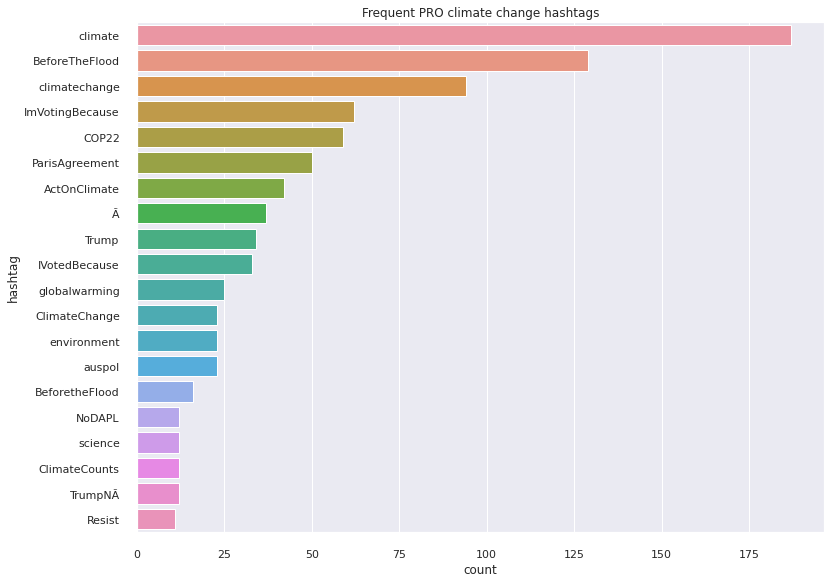

In [24]:
# Plot the frequent hastags for pro climate change sentiments
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=pro,y=pro['hashtag'], x=pro['count'])
plt.title('Frequent PRO climate change hashtags')
plt.tight_layout()

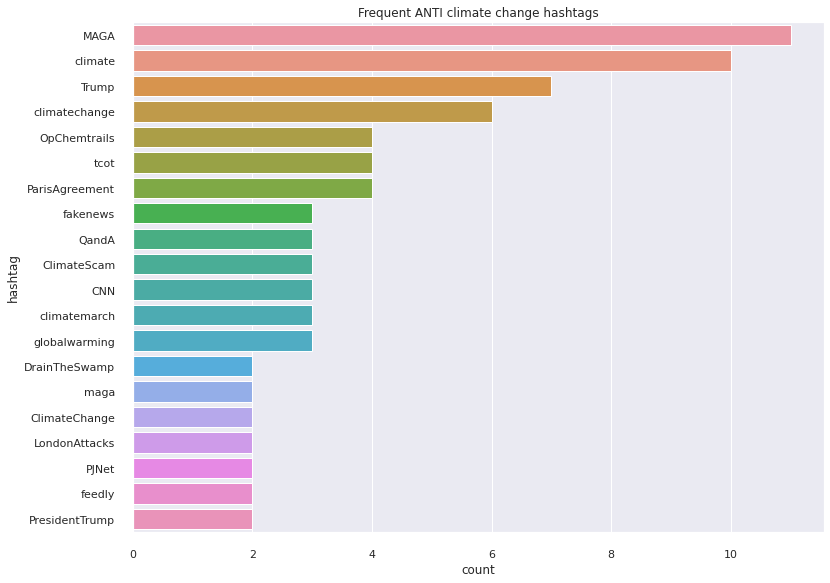

In [25]:
# Plot the frequent hastags for anti climate change sentiments
sns.barplot(data=anti,y=anti['hashtag'], x=anti['count'])
plt.title('Frequent ANTI climate change hashtags')
plt.tight_layout()

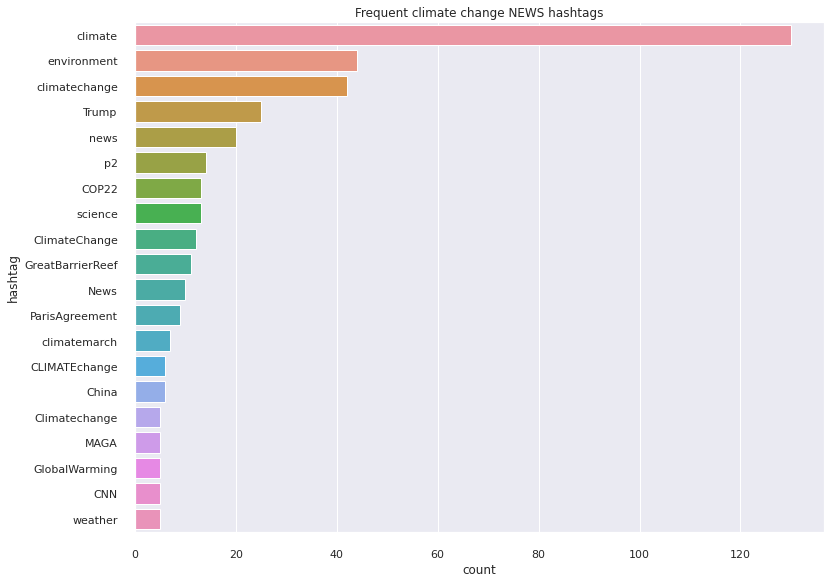

In [26]:
# Plot the frequent hastags for the news sentiment
sns.barplot(y=news['hashtag'], x=news['count'])
plt.title('Frequent climate change NEWS hashtags')
plt.tight_layout()

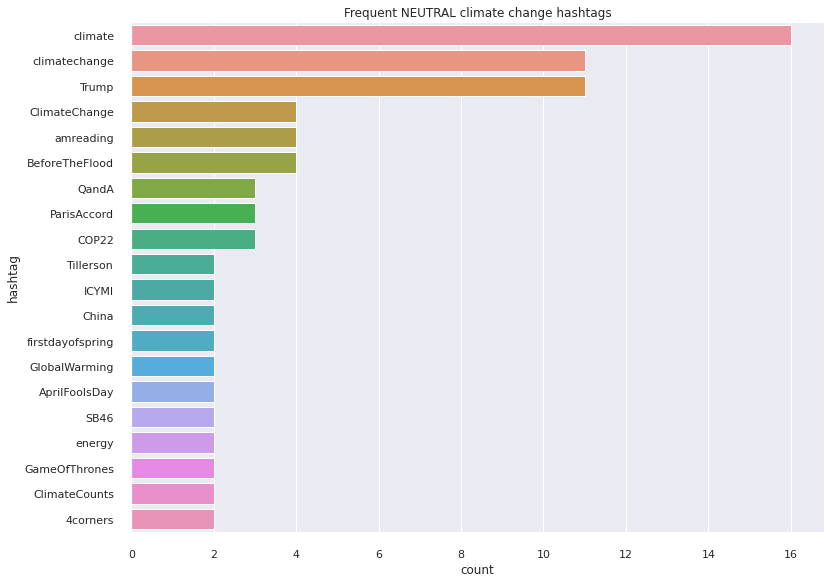

In [27]:
# Plot the frequent hastags for the neutral sentiment
sns.barplot(y=neutral['hashtag'], x=neutral['count'])
plt.title('Frequent NEUTRAL climate change hashtags')
plt.tight_layout()

In [28]:
print('News climate change information')
display(news_info)

News climate change information


,people,geopolitics,organizations
0,scott pruitt,china,epa
1,donald trump,paris,white house
2,rex tillerson,california,exxon
3,gore,australia,cnn
4,john kerry,india,cdc
5,jerry brown warn,america,reuters
6,vladimir putin,washington,washington post
7,michael bloomberg,france,bbc news
8,epa website,new york,nasa
9,dana nuccitelli,canada,energy department


In [29]:
print('Anti climate change information')
display(anti_info)

Anti climate change information


,people,geopolitics,organizations
0,gore,manhattan,epa
1,hillary,paris,fakeã
2,bunch oxford,america,cnn
3,steve,california,econom
4,gore fraud,london,nato
5,clinton,chicago,makada pope francis
6,george bush,russia,cnn brian
7,sally kohn,new york,white house
8,lmao,iran,muã
9,todd starnes,new orleans,global warm hoax


In [30]:
print('Neutral climate change information')
display(neutral_info)

Neutral climate change information


,people,geopolitics,organizations
0,hillary,china,epa
1,malcolm roberts,paris,white house
2,hillary clinton,russia,cnn
3,taylor,america,bbc
4,clinton,australia,select myron ebell climate change global warm ...
5,dari hewan,chicago,congress
6,adalah,canada,orthodox patriarch bartholomew
7,scott pruitt,california,supreme court
8,donald trump,santa,nato
9,arthur,north korea,national geographic


In [31]:
print('Pro climate change information')
print(pro_info)

Pro climate change information
            people geopolitics        organizations
0     scott pruitt     america                  epa
1  hillary clinton       china                 nasa
2              hrc       paris          white house
3   non competitiã     florida                  gop
4   doesnã believe  california             congress
5          hillary      russia                  htt
6           doesnã    new york  irony florida state
7     donald trump   australia               senate
8             gore       india      washington post
9             donã        lgbt                  cnn


## Model Training

In [32]:
#call split function
#X_train, X_test, y_train, y_test = model_script.splitDataset(df)
X_train, X_test, y_train, y_test = model_script.splitDataset(df)

In [33]:
X_train.shape

(11864,)

In [34]:
# Logistic Regression
model_script.modelTrain(LogisticRegression(max_iter=1000), 'logisticRegression', X_train, y_train)
# K-NN Classifier
model_script.modelTrain(KNeighborsClassifier(), 'kNeighborsClassifier', X_train, y_train)
# RandomForest
model_script.modelTrain(RandomForestClassifier(), 'randomForestClassifier', X_train, y_train)
# Naïve Bayes:
model_script.modelTrain(MultinomialNB(), 'naiveBayes', X_train, y_train)
# Linear SVC:
model_script.modelTrain(LinearSVC(), 'linearSVC', X_train, y_train)
# Decision tree
model_script.modelTrain(DecisionTreeClassifier(), 'dTreeClassifier', X_train, y_train)

In [35]:
# Loading models from saved plk files
logisticRegression = model_script.loadModel('logisticRegression')
kNeighborsClassifier = model_script.loadModel('kNeighborsClassifier')
randomForestClassifier = model_script.loadModel('randomForestClassifier')
naiveBayes = model_script.loadModel('naiveBayes')
linearSVC = model_script.loadModel('linearSVC')
dTreeClassifier = model_script.loadModel('dTreeClassifier')


## Model evaluation

In [36]:
y_pred_logisticRegression = model_script.getPrediction(logisticRegression, X_test)
y_pred_kNeighborsClassifier = model_script.getPrediction(kNeighborsClassifier, X_test)
y_pred_randomForestClassifier = model_script.getPrediction(randomForestClassifier, X_test)
y_pred_naiveBayes = model_script.getPrediction(naiveBayes, X_test)
y_pred_linearSVC = model_script.getPrediction(linearSVC, X_test)
y_pred_dTreeClassifier = model_script.getPrediction(dTreeClassifier, X_test)

In [37]:
model_script.modelEvaluation(y_test, y_pred_logisticRegression)

              precision    recall  f1-score   support

        Anti       0.80      0.28      0.42       336
     Neutral       0.59      0.34      0.43       547
        News       0.75      0.68      0.71       894
         Pro       0.72      0.89      0.80      2178

    accuracy                           0.72      3955
   macro avg       0.71      0.55      0.59      3955
weighted avg       0.71      0.72      0.69      3955



In [38]:
model_script.modelEvaluation(y_test, y_pred_kNeighborsClassifier)


              precision    recall  f1-score   support

        Anti       0.49      0.35      0.41       336
     Neutral       0.36      0.40      0.38       547
        News       0.59      0.67      0.63       894
         Pro       0.74      0.71      0.72      2178

    accuracy                           0.63      3955
   macro avg       0.55      0.53      0.54      3955
weighted avg       0.63      0.63      0.63      3955



In [39]:
model_script.modelEvaluation(y_test, y_pred_randomForestClassifier)

              precision    recall  f1-score   support

        Anti       0.81      0.26      0.39       336
     Neutral       0.57      0.34      0.43       547
        News       0.74      0.63      0.68       894
         Pro       0.70      0.89      0.79      2178

    accuracy                           0.70      3955
   macro avg       0.71      0.53      0.57      3955
weighted avg       0.70      0.70      0.68      3955



In [40]:
model_script.modelEvaluation(y_test, y_pred_naiveBayes)

              precision    recall  f1-score   support

        Anti       1.00      0.04      0.09       336
     Neutral       0.86      0.07      0.12       547
        News       0.84      0.44      0.58       894
         Pro       0.62      0.97      0.76      2178

    accuracy                           0.65      3955
   macro avg       0.83      0.38      0.38      3955
weighted avg       0.73      0.65      0.57      3955



In [41]:
model_script.modelEvaluation(y_test, y_pred_linearSVC )

              precision    recall  f1-score   support

        Anti       0.68      0.43      0.52       336
     Neutral       0.53      0.42      0.47       547
        News       0.70      0.72      0.71       894
         Pro       0.76      0.84      0.80      2178

    accuracy                           0.72      3955
   macro avg       0.67      0.60      0.62      3955
weighted avg       0.71      0.72      0.71      3955



In [42]:
model_script.modelEvaluation(y_test, y_pred_dTreeClassifier)

              precision    recall  f1-score   support

        Anti       0.49      0.33      0.40       336
     Neutral       0.40      0.38      0.39       547
        News       0.62      0.63      0.62       894
         Pro       0.71      0.75      0.72      2178

    accuracy                           0.63      3955
   macro avg       0.55      0.52      0.53      3955
weighted avg       0.63      0.63      0.63      3955



In [43]:
text = 'Global warming creates job'
input = tweet_preprocessor.preprocess_tweet(text)
input = [text]

y_pred = model_script.getPrediction(linearSVC,input)
print (y_pred)

['Anti']
